# Chapter 2. Supervised Learning

Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs. Goal is to make accurate predictions for new, never-before-seen data.

## Classification and Regression

These are the two major types of supervised machine learning problems.
- Classification the goal is to predict a *class label*
- Classification can be used to distiguish between two classes (*binary classification*) and more than two classes (*multiclass classification*)
- Regression the goal is to predict a continuous number (*floating-point number/real number*).

Generalization of model is dependent on the evaluation of the model on an unseen, but representative (expected) test set

OVerfitting is building a model that is too *complex* for the amount of information available to the model. It occurs when a model is fit too closely to the particularities of the training set. Too simple of a model, not capture all the aspects of and variability in the data, leads to *underfitting*. You can view a graph to display the model complexity (under/overfitting) on the x-axis and the accuracy on the y-axis to identify a "sweet spot" under which conditions the training and testing data are mutually greatest [Figure 2-1].

model complexity is initimately tied to the variation of inputs contained in a training dataset. The larger the variety of data points your dataset contains, the more complex a model you can use without overfitting.

In [2]:
!pip3 install mglearn

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 682.2 kB/s eta 0:00:000:00:010:00:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:01:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=9b90b4592e7c3ab9edf6b08ede73400d4a3bddcdde06a3fa1c55c7a6ed6c87a5
  Stored in directory: /home/friend/

In [1]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import mglearn
import matplotlib.pyplot as plt

X.shape: (26, 2)


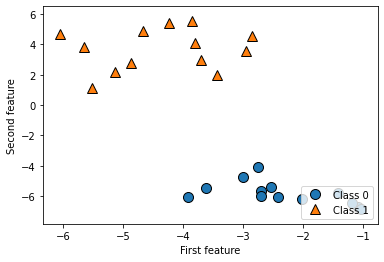

In [5]:
# generate dataset
X,y = sklearn.datasets.make_blobs(n_samples=26, centers=2)
# plot dataset
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

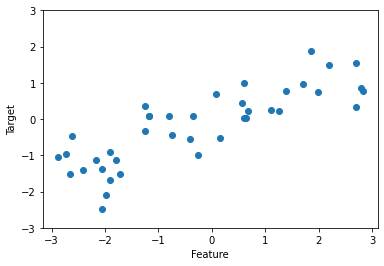

In [12]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counters per class:\n{}".format(
{n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names: \n {}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sample counters per class:
{'malignant': 212, 'benign': 357}
Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [22]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [23]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## k-Nearest Neighbors

Arguably the simplest machine learning algorithm. Consists of storing the training dataset. The algorithm finds the closest data points in the training dataset -- its  "nearest neighbors."

### k-Neighbors classification

/home/friend/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


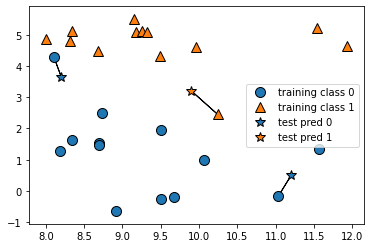

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/friend/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


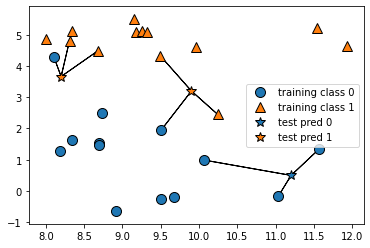

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [27]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=0)

/home/friend/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


### Analyzing KNeighborsClassifier
- viewing the *decision boundary* which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

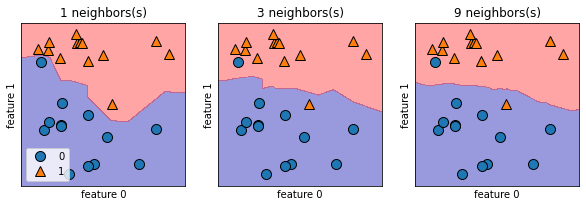

In [31]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    #the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

confirming connection between model complexity and generalization

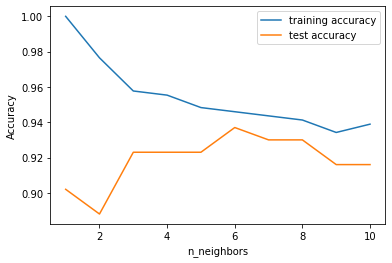

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-neighbors regression
Using the target value of the nearest neighbor

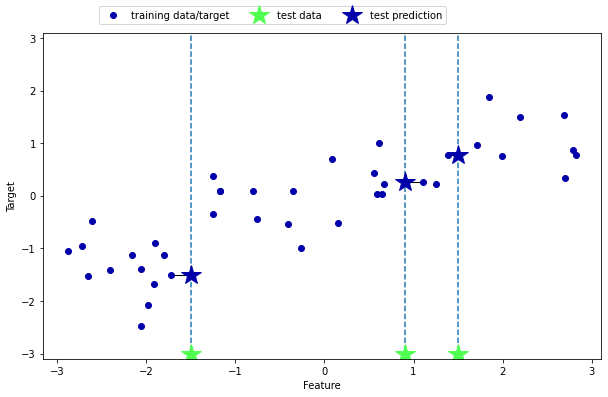

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=1)


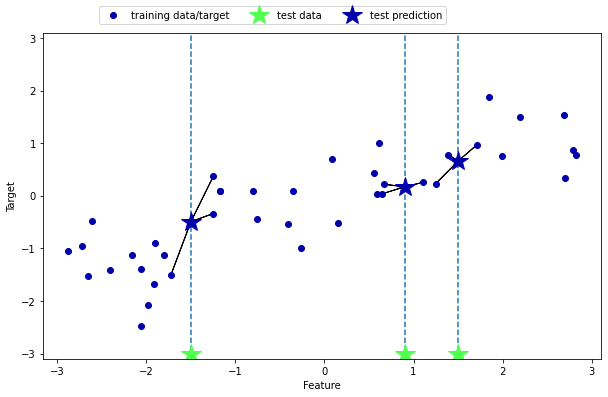

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
#split the wave dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

#instatiate the model and set the  number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
#fit the model using the training data and training targets
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


### Analyzing KNeighborsRegressor

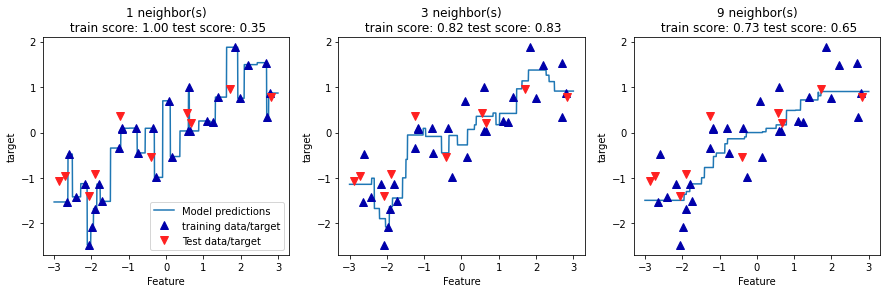

In [51]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("target")
    axes[0].legend(["Model predictions", "training data/target",
                   "Test data/target"], loc="best")